In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Визначити кореляцію кількості активних хворих в різних областях та побудувати відповідну таблицю

In [383]:
from pandas.core import nanops
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv("covid19.csv", sep=",")
df = df[['registration_area','active_confirm','zvit_date']]
df.set_index('zvit_date', inplace=True)
df = df.groupby(['zvit_date','registration_area']).sum()
df.reset_index(inplace=True)
df.set_index('zvit_date', inplace=True)
df.index = pd.to_datetime(df.index)

df_by_region = pd.DataFrame()
for i in df['registration_area'].unique():
    df_by_region[i] = df[df['registration_area'] == i].active_confirm
df_by_region = df_by_region.fillna(0)

df_by_region.corr()

,Рівненська,Львівська,Івано-Франківська,Житомирська,Донецька,Миколаївська,Чернівецька,м. Київ,Хмельницька,Кіровоградська,Тернопільська,Волинська,Одеська,Херсонська,Закарпатська,Черкаська,Запорізька,Сумська,Вінницька,Луганська,Київська,Полтавська,Дніпропетровська,Харківська,Чернігівська
Рівненська,1.000000,0.959910,0.941163,0.876627,0.784541,0.825633,0.877236,0.935271,0.847161,0.569319,0.854580,0.901375,0.897122,0.782548,0.977269,0.807343,0.825796,0.816998,0.926540,0.784659,0.870200,0.743244,0.792832,0.874705,0.877547
Львівська,0.959910,1.000000,0.979560,0.928116,0.859861,0.904811,0.929780,0.988868,0.929932,0.614930,0.929794,0.956563,0.973023,0.861985,0.985601,0.906302,0.912538,0.894719,0.978399,0.857069,0.952843,0.812901,0.873808,0.952097,0.953602
Івано-Франківська,0.941163,0.979560,1.000000,0.967736,0.910796,0.944542,0.963524,0.976610,0.958988,0.719254,0.886577,0.969095,0.981958,0.919875,0.956202,0.930546,0.948644,0.941653,0.975974,0.915413,0.949123,0.883230,0.922085,0.974822,0.973265
Житомирська,0.876627,0.928116,0.967736,1.000000,0.968921,0.982256,0.979453,0.940540,0.987827,0.832252,0.835518,0.978096,0.970150,0.977300,0.885526,0.959292,0.979190,0.981547,0.963030,0.975507,0.937798,0.954144,0.966329,0.985998,0.986176
Донецька,0.784541,0.859861,0.910796,0.968921,1.000000,0.984760,0.925886,0.877705,0.973037,0.852670,0.726376,0.953749,0.922458,0.994673,0.806516,0.962172,0.980009,0.991408,0.918826,0.993903,0.888088,0.990263,0.986280,0.959687,0.955377
Миколаївська,0.825633,0.904811,0.944542,0.982256,0.984760,1.000000,0.962348,0.929112,0.990711,0.809706,0.811687,0.977529,0.963087,0.988548,0.846448,0.985913,0.996003,0.996837,0.954467,0.982893,0.940439,0.968364,0.992867,0.986658,0.982769
Чернівецька,0.877236,0.929780,0.963524,0.979453,0.925886,0.962348,1.000000,0.959156,0.977578,0.799870,0.890618,0.974489,0.978874,0.944943,0.878630,0.957808,0.967426,0.953143,0.969387,0.929907,0.968933,0.898686,0.948242,0.980852,0.981395
м. Київ,0.935271,0.988868,0.976610,0.940540,0.877705,0.929112,0.959156,1.000000,0.951112,0.643867,0.943622,0.975140,0.987832,0.885187,0.954823,0.942388,0.940231,0.915265,0.990899,0.870503,0.984753,0.827337,0.906055,0.970439,0.970698
Хмельницька,0.847161,0.929932,0.958988,0.987827,0.973037,0.990711,0.977578,0.951112,1.000000,0.804745,0.857935,0.986278,0.982248,0.979155,0.873827,0.983836,0.993467,0.986754,0.970122,0.972061,0.962077,0.947714,0.978315,0.995850,0.995730
Кіровоградська,0.569319,0.614930,0.719254,0.832252,0.852670,0.809706,0.799870,0.643867,0.804745,1.000000,0.525982,0.751390,0.717527,0.870820,0.567960,0.766841,0.801881,0.823230,0.709434,0.869541,0.679917,0.883340,0.817350,0.768437,0.768094


### Створити функцію для розрахунку лагової кореляції між 2 рядами даних, яка на вхід приймає 3 аргументи: 2 ряди даних та тестований лаг “T”

In [384]:
def max_lag_corr(row1: pd.Series, row2: pd.Series, T):
    max_T = 0
    max_corr = -1
    for i in range(-T, T + 1):
        corr = row1.corr(row2) if i == 0 else row1.shift(i)[abs(i):-abs(i)].corr(row2[abs(i):-abs(i)])
        if max_corr < corr:
            max_corr = corr
            max_T = i
    return {'max_corr': max_corr, 'max_lag': max_T}

def lag(dataframe, method):
    numeric_df = dataframe._get_numeric_data()
    cols = numeric_df.columns
    idx = cols.copy()
    mat = numeric_df.to_numpy(dtype=float, na_value=np.nan, copy=False)

    min_periods = 1
    mat = mat.T
    corrf = nanops.get_corr_func(method)
    K = len(cols)
    correl = np.empty((K, K), dtype=float)
    mask = np.isfinite(mat)
    for i, ac in enumerate(mat):
        for j, bc in enumerate(mat):
            if i > j:
                continue
            valid = mask[i] & mask[j]
            if valid.sum() < min_periods:
                c = np.nan
            elif i == j:
                c = 0
            elif not valid.all():
                c = corrf(ac[valid], bc[valid])
            else:
                c = corrf(ac, bc)
            correl[i, j] = c
            correl[j, i] = -c

    return dataframe._constructor(correl, index=idx, columns=cols)

### Побудувати 2 зведені таблиці-звіти по лаговим затримкам в динаміці захворівших по областях (по рядкам та колонкам – назви областей. На перетині значення лагу з максимальним коефіцієнтом кореляції). Друга таблиця містить коефіцієнти кореляції

In [385]:
max_corr_table = df_by_region.corr(method=lambda x, y: max_lag_corr(pd.Series(x), pd.Series(y), 50)['max_corr'])
max_corr_table

,Рівненська,Львівська,Івано-Франківська,Житомирська,Донецька,Миколаївська,Чернівецька,м. Київ,Хмельницька,Кіровоградська,Тернопільська,Волинська,Одеська,Херсонська,Закарпатська,Черкаська,Запорізька,Сумська,Вінницька,Луганська,Київська,Полтавська,Дніпропетровська,Харківська,Чернігівська
Рівненська,1.000000,0.961526,0.955974,0.894719,0.833528,0.849681,0.877236,0.949719,0.859501,0.569319,0.930741,0.908540,0.926405,0.782548,0.977269,0.811173,0.850659,0.871210,0.931794,0.851950,0.878034,0.781186,0.792832,0.910592,0.891073
Львівська,0.961526,1.000000,0.983055,0.936600,0.859861,0.904811,0.929780,0.988999,0.929932,0.614930,0.933594,0.956563,0.973023,0.861985,0.985601,0.906302,0.912538,0.915687,0.978399,0.888596,0.952843,0.812901,0.873808,0.952097,0.953602
Івано-Франківська,0.955974,0.983055,1.000000,0.968216,0.910796,0.952023,0.963524,0.986511,0.959531,0.719254,0.961549,0.969095,0.981958,0.919875,0.956202,0.930562,0.948644,0.955641,0.975974,0.943613,0.955457,0.883230,0.922085,0.974822,0.973265
Житомирська,0.894719,0.936600,0.968216,1.000000,0.968921,0.986388,0.980705,0.975040,0.988137,0.832252,0.986398,0.984079,0.990224,0.977300,0.889879,0.976032,0.988292,0.987210,0.978714,0.978991,0.979649,0.954144,0.970062,0.988316,0.987672
Донецька,0.833528,0.859861,0.910796,0.968921,1.000000,0.994623,0.925886,0.952121,0.995200,0.852670,0.984751,0.967658,0.985058,0.994673,0.874559,0.996718,0.993194,0.993746,0.946768,0.994353,0.991105,0.991753,0.993401,0.994168,0.986348
Миколаївська,0.849681,0.904811,0.952023,0.986388,0.994623,1.000000,0.962348,0.979125,0.995064,0.810400,0.990097,0.980295,0.992854,0.993761,0.866404,0.994095,0.996498,0.997332,0.966586,0.993829,0.991066,0.976965,0.993086,0.991759,0.986156
Чернівецька,0.877236,0.929780,0.963524,0.980705,0.925886,0.962348,1.000000,0.979316,0.977578,0.799870,0.952425,0.974489,0.982869,0.944943,0.950108,0.957808,0.967426,0.969451,0.969387,0.952899,0.974629,0.911237,0.948242,0.981467,0.981395
м. Київ,0.949719,0.988999,0.986511,0.975040,0.952121,0.979125,0.979316,1.000000,0.966459,0.643867,0.967551,0.982183,0.990944,0.902038,0.978395,0.943057,0.945319,0.937184,0.993393,0.926550,0.984753,0.844843,0.907735,0.980219,0.981777
Хмельницька,0.859501,0.929932,0.959531,0.988137,0.995200,0.995064,0.977578,0.966459,1.000000,0.804745,0.980753,0.987103,0.996749,0.979155,0.891825,0.993457,0.993828,0.992640,0.977661,0.986326,0.989107,0.952556,0.978315,0.998171,0.996173
Кіровоградська,0.569319,0.614930,0.719254,0.832252,0.852670,0.810400,0.799870,0.643867,0.804745,1.000000,0.947165,0.841421,0.931319,0.955759,0.706318,0.977578,0.972301,0.950044,0.844781,0.981353,0.969508,0.940204,0.946062,0.950886,0.937838


In [386]:
max_lag_table = lag(df_by_region, method=lambda x, y: max_lag_corr(pd.Series(x), pd.Series(y), 50)['max_lag'])
max_lag_table

,Рівненська,Львівська,Івано-Франківська,Житомирська,Донецька,Миколаївська,Чернівецька,м. Київ,Хмельницька,Кіровоградська,Тернопільська,Волинська,Одеська,Херсонська,Закарпатська,Черкаська,Запорізька,Сумська,Вінницька,Луганська,Київська,Полтавська,Дніпропетровська,Харківська,Чернігівська
Рівненська,0.0,-17.0,-10.0,-14.0,-44.0,-21.0,0.0,-23.0,-22.0,0.0,-50.0,-15.0,-49.0,0.0,0.0,-21.0,-25.0,-27.0,-15.0,-50.0,-20.0,-23.0,0.0,-50.0,-21.0
Львівська,17.0,0.0,50.0,-16.0,0.0,0.0,0.0,-2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-28.0,0.0,-23.0,0.0,0.0,0.0,0.0,0.0
Івано-Франківська,10.0,-50.0,0.0,-3.0,0.0,29.0,0.0,-50.0,30.0,0.0,26.0,0.0,0.0,0.0,0.0,-1.0,0.0,30.0,0.0,29.0,30.0,0.0,0.0,0.0,0.0
Житомирська,14.0,16.0,3.0,0.0,0.0,-5.0,4.0,-50.0,1.0,0.0,-44.0,4.0,-37.0,0.0,-50.0,-9.0,-8.0,-24.0,8.0,-17.0,-28.0,0.0,-4.0,-8.0,2.0
Донецька,44.0,0.0,0.0,0.0,0.0,-33.0,0.0,-50.0,-34.0,0.0,-32.0,-10.0,-50.0,0.0,50.0,-13.0,-26.0,-3.0,-15.0,1.0,-28.0,3.0,-5.0,-50.0,-36.0
Миколаївська,21.0,0.0,-29.0,5.0,33.0,0.0,0.0,-50.0,10.0,1.0,-28.0,10.0,-46.0,2.0,-50.0,-5.0,-2.0,1.0,-9.0,3.0,-21.0,3.0,-1.0,-29.0,-24.0
Чернівецька,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,-50.0,0.0,0.0,-28.0,0.0,-36.0,0.0,-50.0,0.0,0.0,-26.0,0.0,-19.0,-8.0,-24.0,0.0,-9.0,0.0
м. Київ,23.0,2.0,50.0,50.0,50.0,50.0,50.0,0.0,6.0,0.0,-19.0,7.0,4.0,6.0,50.0,2.0,5.0,-28.0,6.0,18.0,0.0,18.0,2.0,7.0,7.0
Хмельницька,22.0,0.0,-30.0,-1.0,34.0,-10.0,0.0,-6.0,0.0,0.0,-28.0,3.0,-31.0,0.0,-50.0,14.0,3.0,-27.0,-13.0,16.0,-17.0,16.0,0.0,-8.0,-5.0
Кіровоградська,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-50.0,-31.0,-50.0,-36.0,-50.0,-41.0,-41.0,-46.0,-44.0,-48.0,-42.0,-33.0,-28.0,-50.0,-47.0


### Вивести дані таблиці як графік за допомогою відповідного графіку бібліотеки seaborn correlation.

<AxesSubplot:>

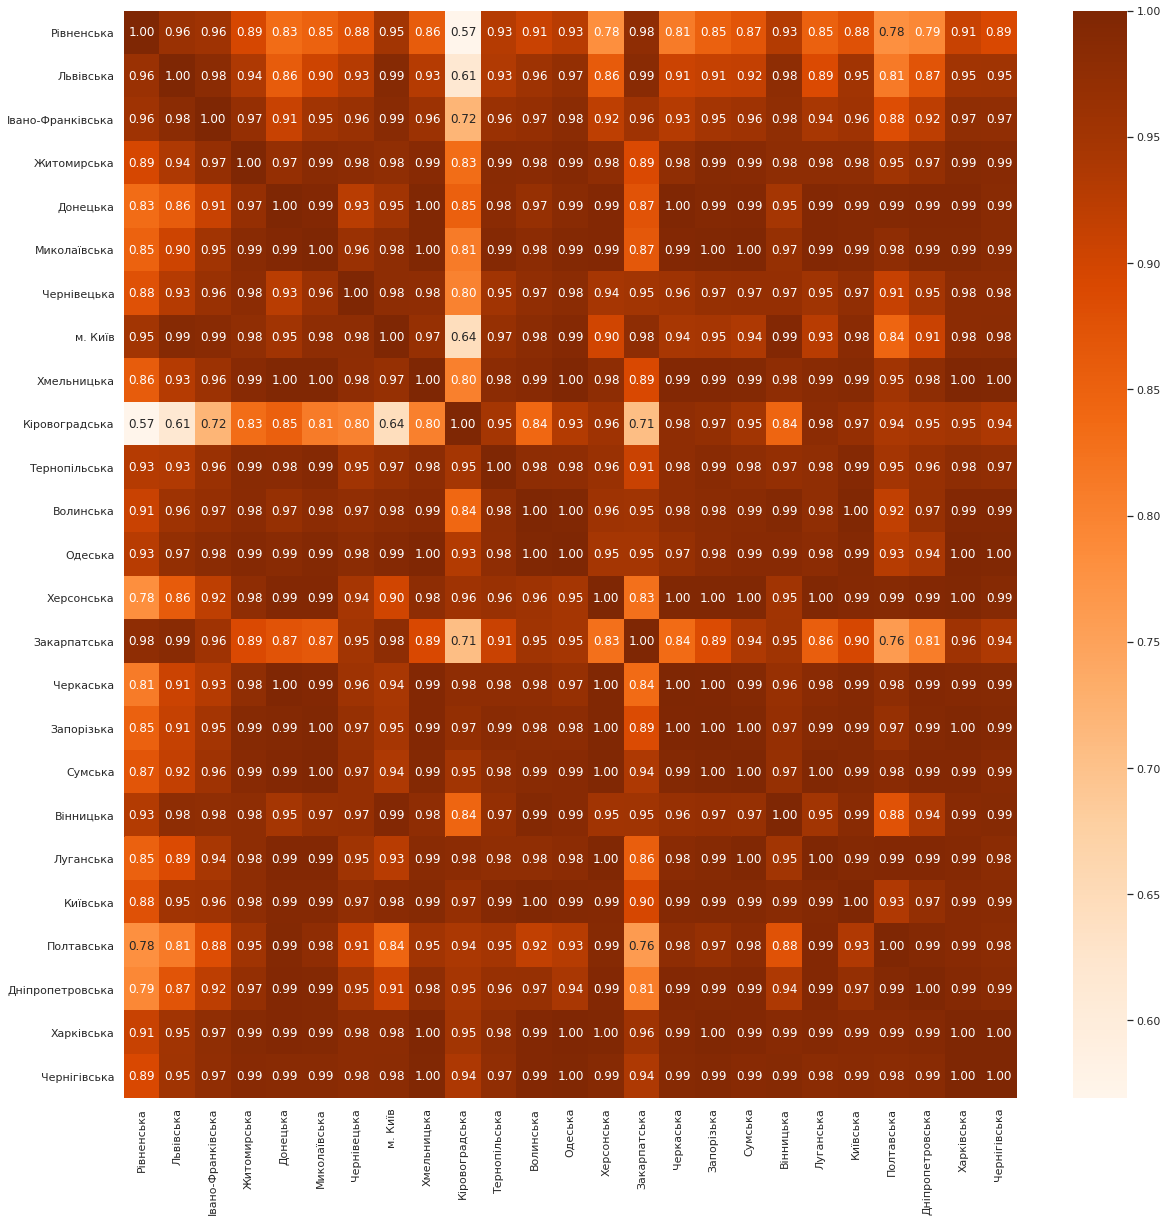

In [387]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(max_corr_table, annot=True, fmt='.2f', ax=ax, cmap='Oranges')

### На основі отриманих даних визначити яка область є в лідерах по динаміці COVID, а яка відстає і наскільки

In [388]:
leading_area = df_by_region.sum().idxmax()
leading_area

'м. Київ'

### На основі даних «лідера» створити прогноз для активних хворих областей, які відстають на отриманий лаг. Для цього нормалізувати дані та скористатись лінійною регресією із бібліотеки scikit-learn

In [389]:
from sklearn import linear_model
from sklearn import preprocessing

In [390]:
df_by_region.fillna(0)
days = np.array((df_by_region.index - df_by_region.index[0]).days).reshape(-1, 1)
confirmed = np.array(df_by_region[leading_area]).reshape(-1, 1)

min_max_scaler_days = preprocessing.MinMaxScaler()
normalized_days = min_max_scaler_days.fit_transform(days)
min_max_scaler_confirmed = preprocessing.MinMaxScaler()
normalized_confirmed = min_max_scaler_confirmed.fit_transform(confirmed)

lr = linear_model.LinearRegression()
lr.fit(normalized_days, normalized_confirmed)
lr.score(normalized_days, normalized_confirmed)

0.7825888428446548

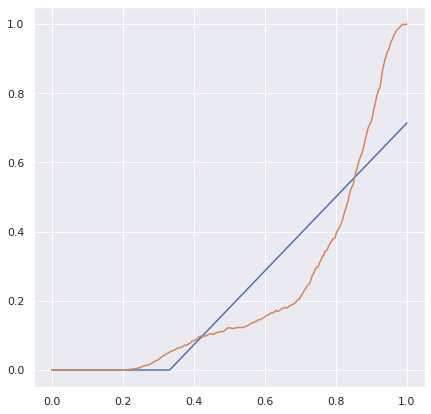

In [391]:
comfirmed_predicted = normalized_days * lr.coef_[0] + lr.intercept_[0]
comfirmed_predicted[comfirmed_predicted < 0] = 0
fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(x=normalized_days.reshape(-1), y=comfirmed_predicted.reshape(-1), ax=ax).set_label('Predicted')

sns.lineplot(x=normalized_days.reshape(-1), y=normalized_confirmed.reshape(-1), ax=ax).set_label('Initial')
plt.show()

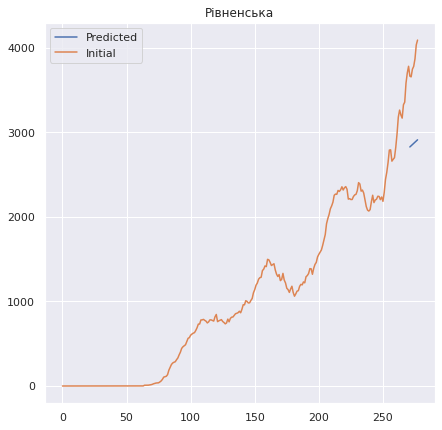

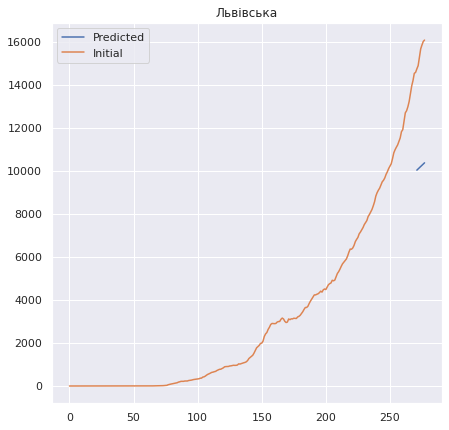

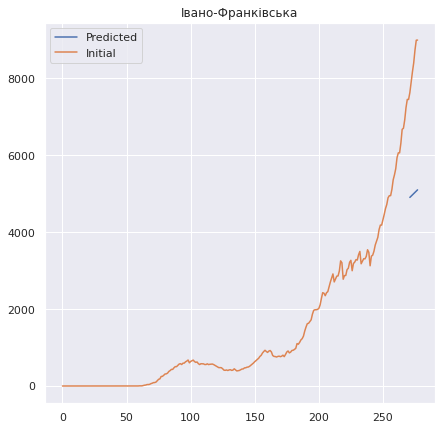

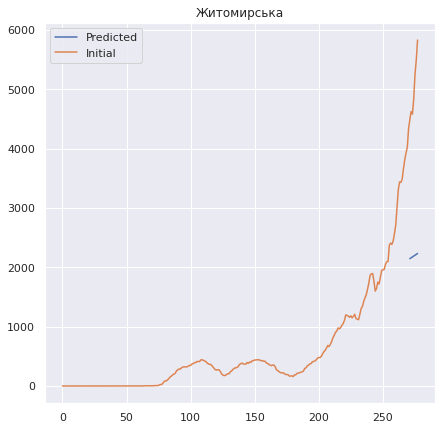

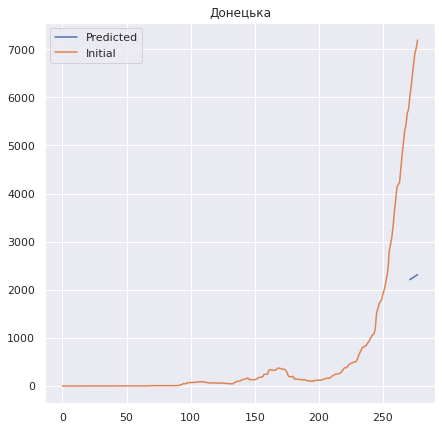

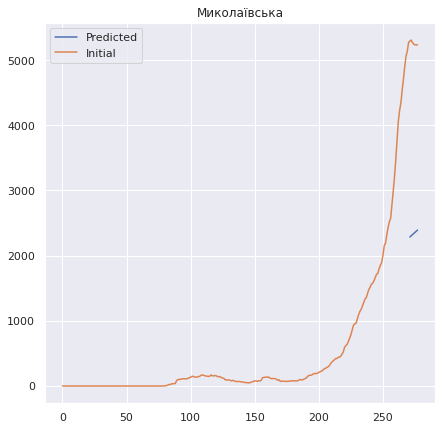

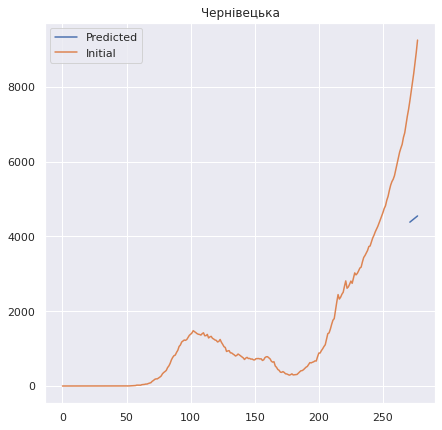

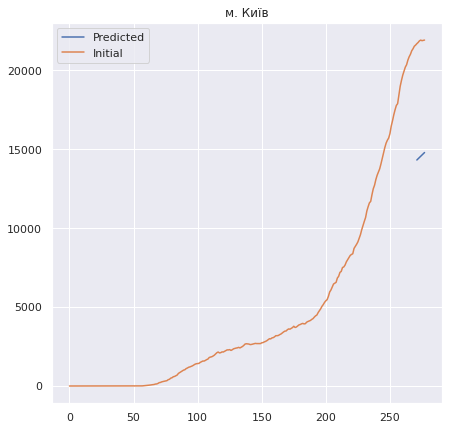

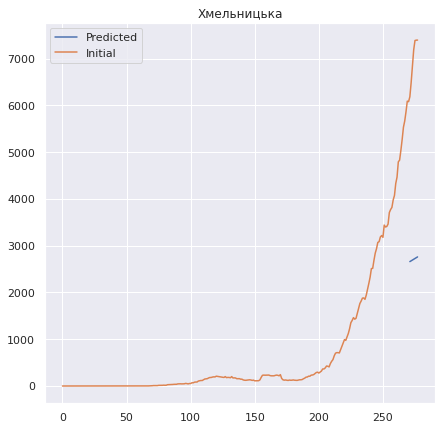

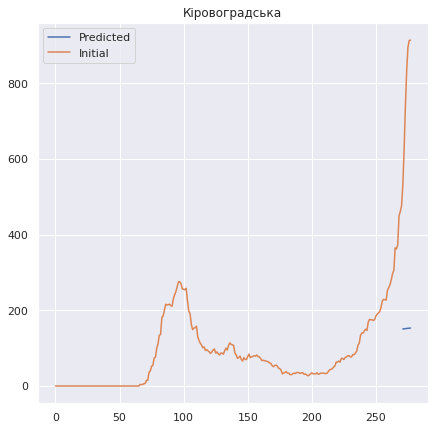

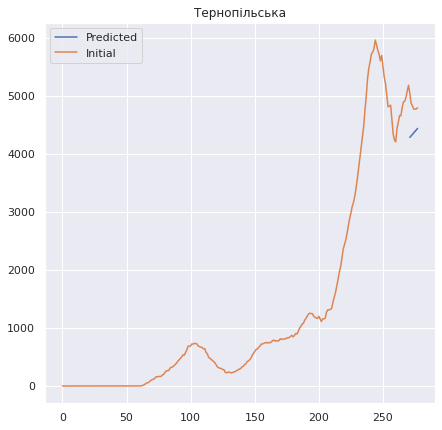

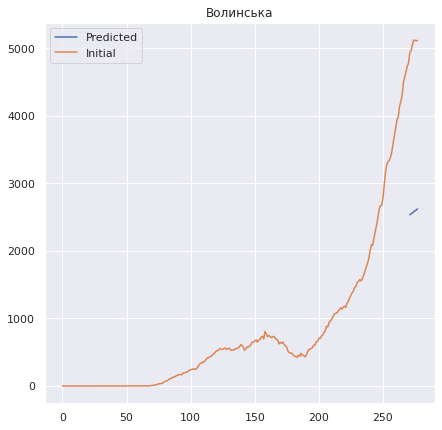

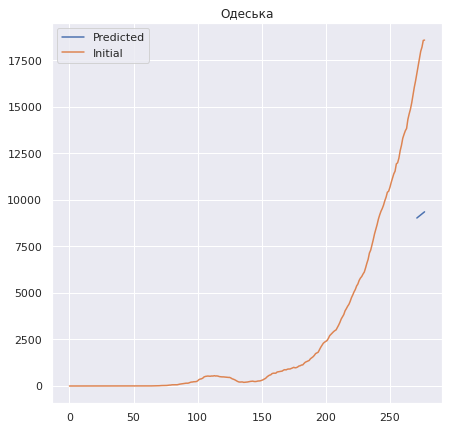

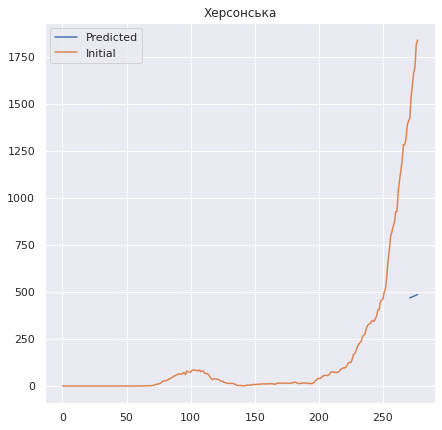

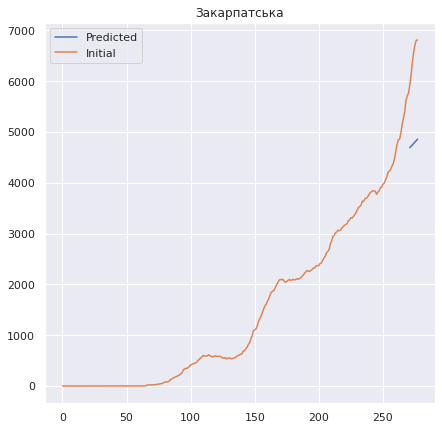

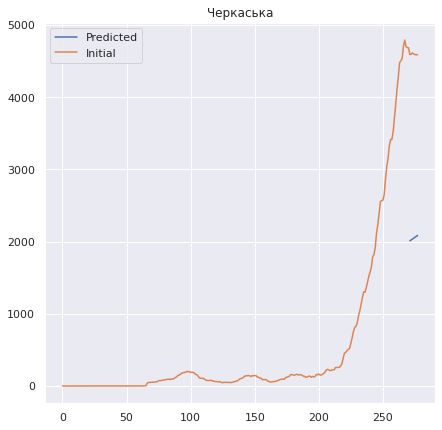

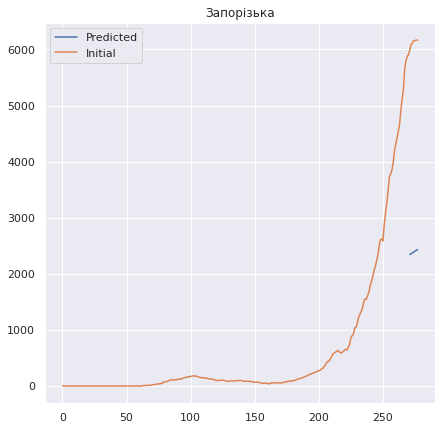

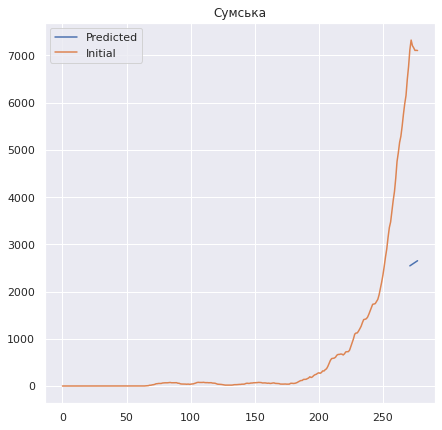

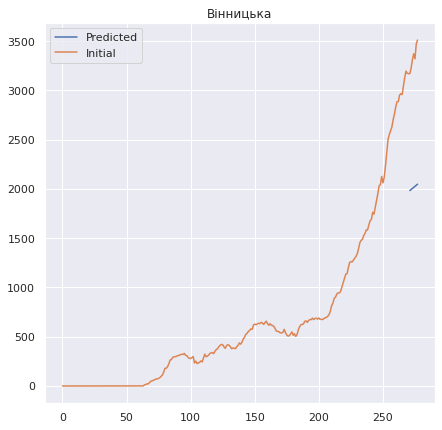

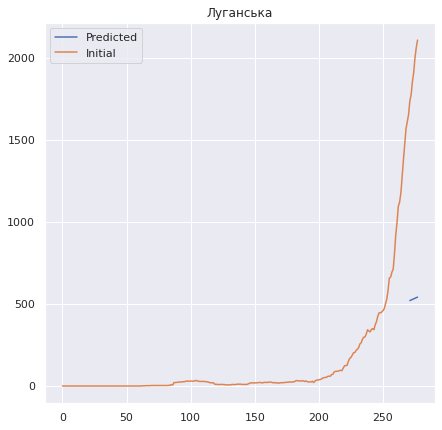

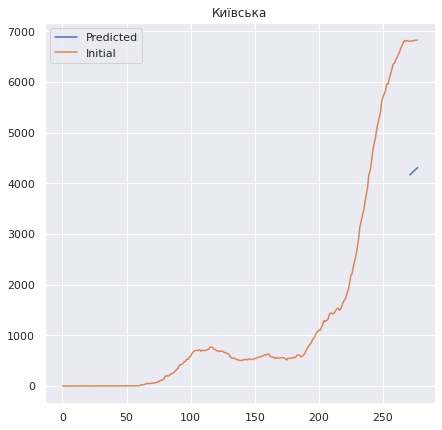

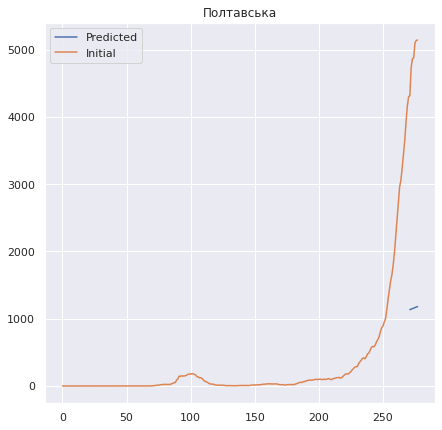

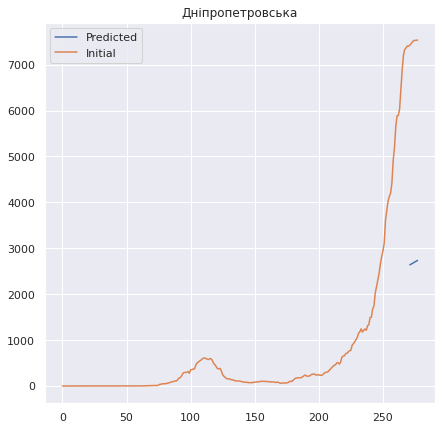

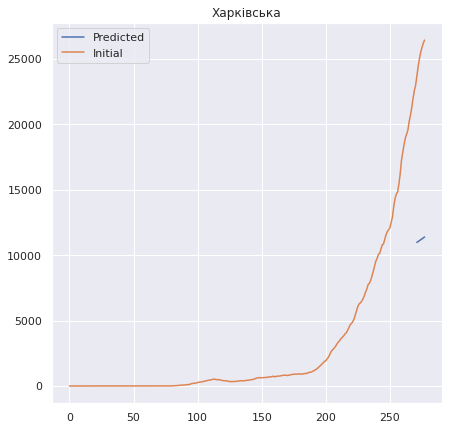

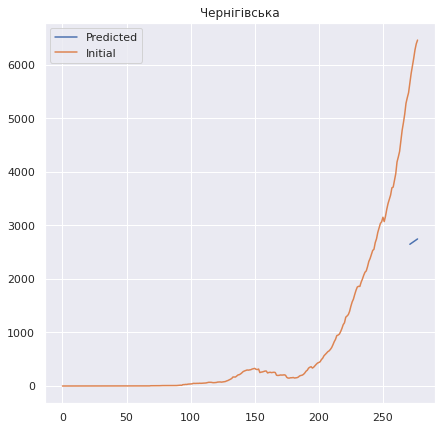

In [392]:
df_by_region.index = pd.to_datetime(df_by_region.index)
for column in df_by_region.columns:
    lag = int(abs(max_lag_table[column][leading_area]))
    comfirmed_x_train = normalized_days[lag:-7].reshape(-1, 1)
    comfirmed_x_test = normalized_days[-7:].reshape(-1, 1)

    # Split the targets into training/testing sets
    comfirmed_y = np.array(df_by_region[column])
    comfirmed_y_train = comfirmed_y[lag:-7].reshape(-1, 1)

    # Create linear regression object
    lr = linear_model.LinearRegression()

    # Train the model using the training sets
    lr.fit(comfirmed_x_train, comfirmed_y_train)

    comfirmed_predicted = comfirmed_x_test * lr.coef_[0] + lr.intercept_[0]

    fig, ax = plt.subplots(figsize=(7, 7))
    sns.lineplot(x=min_max_scaler_days.inverse_transform(comfirmed_x_test).reshape(-1), y=comfirmed_predicted.reshape(-1), ax=ax, label='Predicted')

    sns.lineplot(x=min_max_scaler_days.inverse_transform(normalized_days).reshape(-1), y=comfirmed_y, ax=ax,  label='Initial')
    plt.title(column)
    plt.legend()
    plt.show()

### 3 лідируючі області

In [393]:
list(df_by_region.sum().nlargest(3).index)

['м. Київ', 'Львівська', 'Харківська']